# Time-Varying Exogenous Shocks

In [1]:
from utils.models import *

In [2]:
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
scipy: 1.7.1
statsmodels: 0.13.0
filterpy: 1.4.5


## VIX

In [3]:
wti = load('data/WTI.csv').pct_change().dropna()
c1 = clean_series('contract_1', wti)
vix = load('data/VIX.csv')
vix_shock = calc_shock('VIX', vix)

In [4]:
lags = 1
x0 = np.array([1 for _ in range(lags+1)])
kalman = KF(x0, lags=lags)
kf = kalman.run('contract_1', 'VIX', c1.join(vix_shock).dropna())

<AxesSubplot:>

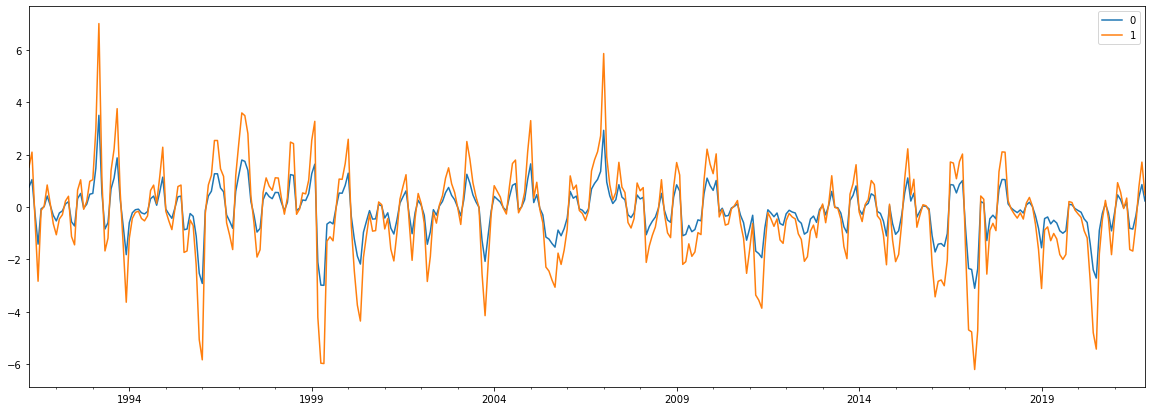

In [5]:
kf.plot(figsize=(20,7))

                                 OLS Regression Results                                
Dep. Variable:             contract_1   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.077
Method:                 Least Squares   F-statistic:                              6.580
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                     0.00156
Time:                        10:43:01   Log-Likelihood:                         -485.88
No. Observations:                 368   AIC:                                      975.8
Df Residuals:                     366   BIC:                                      983.6
Df Model:                           2                                                  
Covariance Type:                  HAC                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

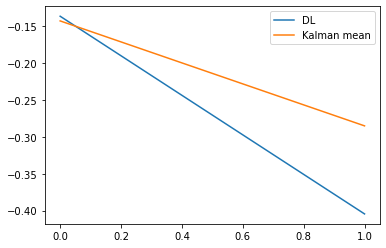

In [18]:
dl = DL('contract_1', 'VIX', c1.join(vix_shock).dropna().iloc[lags:], lags=lags, const=False)
plt.plot(np.cumsum(dl.model.params), label='DL')
plt.plot(kf.mean(), label='Kalman mean')
plt.legend()

RMSE OLS: 0.9915801671702177
RMSE Kalman: 0.6896756732713495


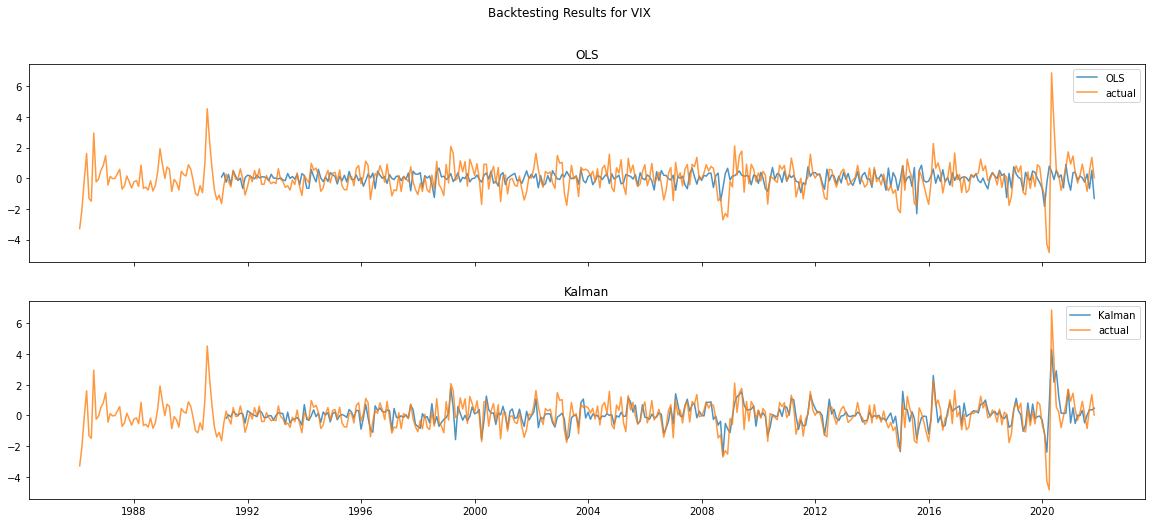

In [7]:
kalman_backtest = kalman.backtest()

x = vix_shock['VIX']
plot_backtests(c1.contract_1, 'VIX', {'OLS': ols_backtest(x, dl.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(c1.index))

## GPR

In [8]:
gpr = load('data/GPRGlobal.csv')
gpr_shock = calc_shock('GPRI', gpr)

In [9]:
kalman = KF(x0, lags=lags)
kf2 = kalman.run('contract_1', 'GPRI', c1.join(gpr_shock).dropna())

<AxesSubplot:>

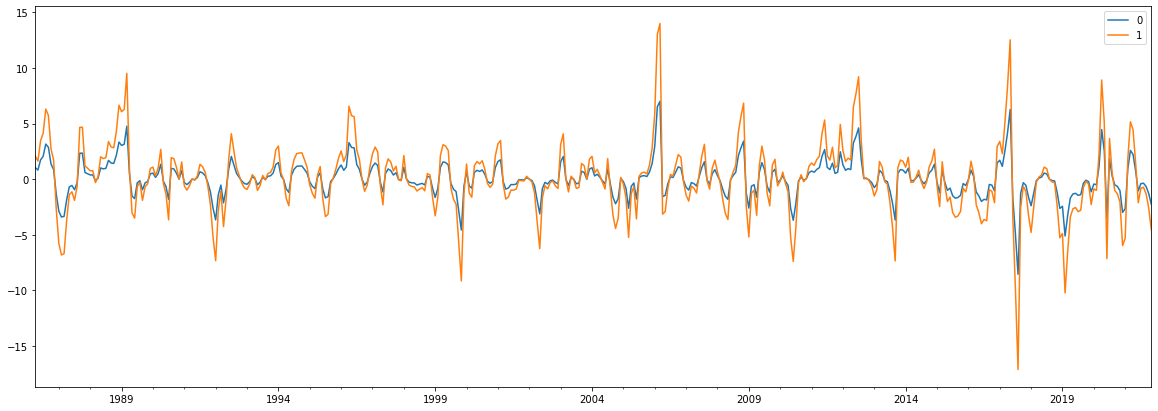

In [10]:
kf2.plot(figsize=(20, 7))

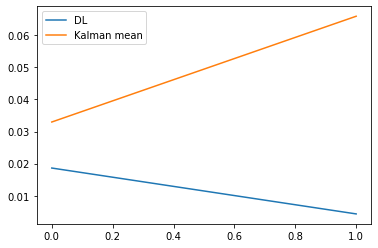

In [20]:
dl2 = DL('contract_1', 'GPRI', c1.join(gpr_shock).dropna().iloc[lags:], lags=lags)
plt.plot(np.cumsum(dl2.model.params), label='DL')
plt.plot(kf2.mean(), label='Kalman mean')
plt.legend()

RMSE OLS: 1.0676784965387633
RMSE Kalman: 0.8267398842327216


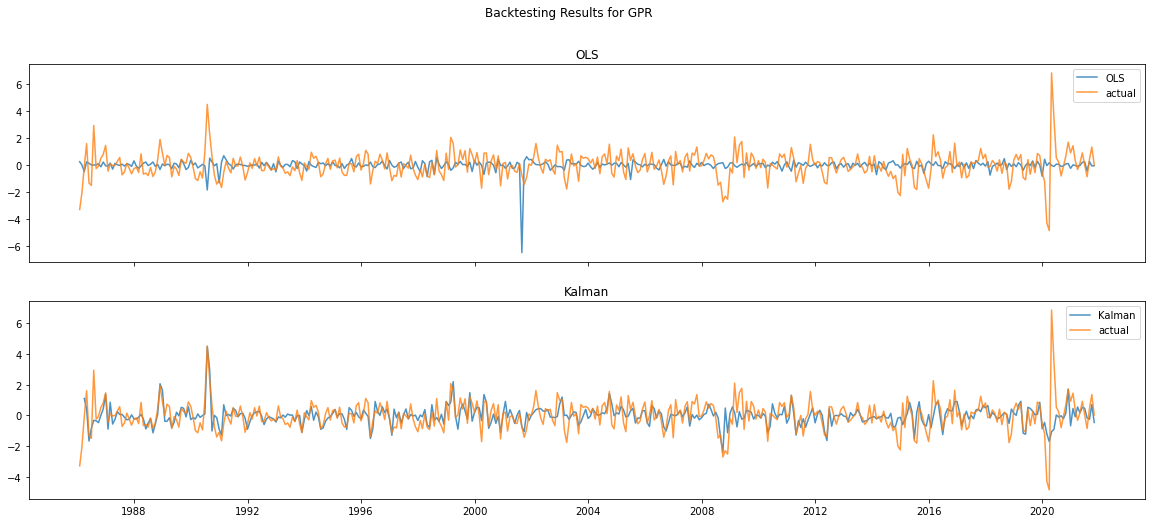

In [12]:
kalman_backtest2 = kalman.backtest()

x = gpr_shock.GPRI
plot_backtests(c1.contract_1, 'GPR', {'OLS': ols_backtest(x, dl.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(c1.index))

## EPU

In [13]:
epu = load('data/EPUGlobal.csv')
epu_shock = calc_shock('GEPU_current', epu)

In [14]:
kalman = KF(x0, lags=lags)
kf3 = kalman.run('contract_1', 'GEPU_current', c1.join(epu_shock).dropna())

<AxesSubplot:>

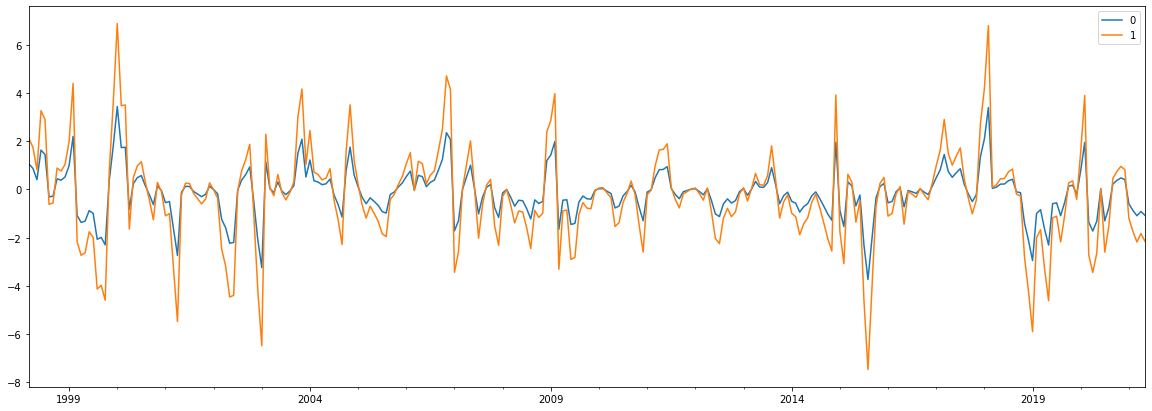

In [15]:
kf3.plot(figsize=(20, 7))

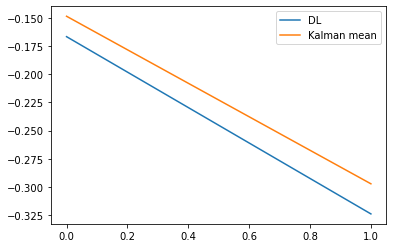

In [16]:
dl3 = DL('contract_1', 'GEPU_current', c1.join(epu_shock).dropna().iloc[lags:], lags=lags)
plt.plot(np.cumsum(dl3.model.params), label='DL')
plt.plot(kf3.mean(), label='Kalman mean')
plt.legend()

RMSE OLS: 1.051512080962155
RMSE Kalman: 0.828052938212221


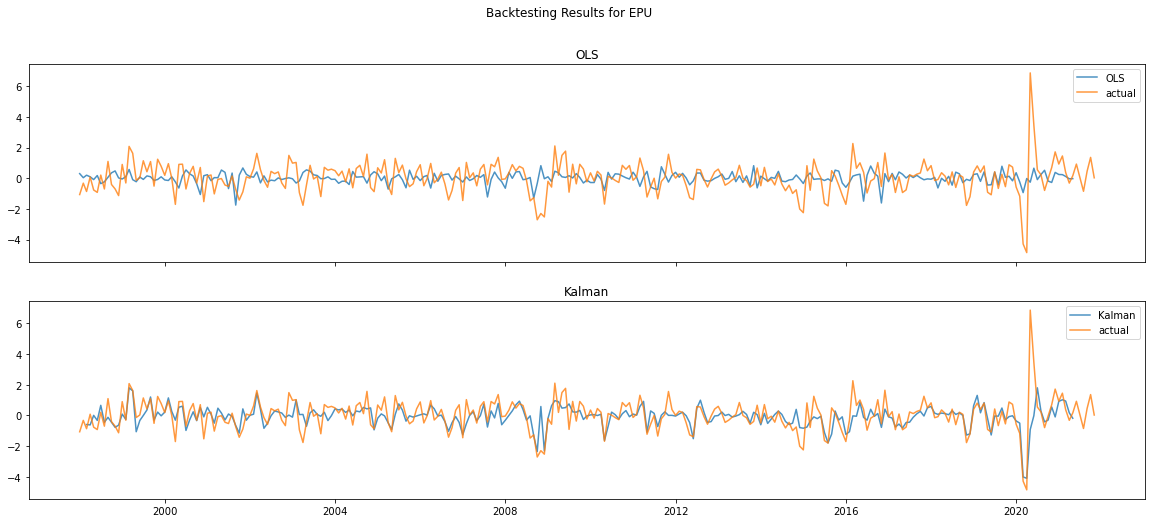

In [17]:
kalman_backtest3 = kalman.backtest()

x = epu_shock.GEPU_current
plot_backtests(c1.contract_1, 'EPU', {'OLS': ols_backtest(x, dl.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(epu_shock.index))